# COVID-19 Data Analysis & Visualizations

Step 1: Load Multiple Datasets (Covid_19_india & Covid_19_Vaccine_Statewise)

Step 2: Data Cleaning, Preprocessing and Data Extracting

Step 3: Create Pivot table in Statewise Deaths, Cured, Confirmed, Recovery Rate and Mortality Rate.

Step 4: Vaccinated Analysis

Step 5: Data Visualizations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [58]:
covid_df=pd.read_csv("D:\Covid 19 in India(03-05-2024)/covid_19_india (1).csv")

In [59]:
covid_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,18110,11-08-2021,8:00 AM,West Bengal,-,-,1506532,18252,1534999
1,18109,11-08-2021,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
2,18108,11-08-2021,8:00 AM,Uttarakhand,-,-,334650,7368,342462
3,18107,11-08-2021,8:00 AM,Tripura,-,-,77811,773,80660
4,18106,11-08-2021,8:00 AM,Telangana,-,-,638410,3831,650353
5,18105,11-08-2021,8:00 AM,Tamil Nadu,-,-,2524400,34367,2579130
6,18104,11-08-2021,8:00 AM,Sikkim,-,-,25095,356,28018
7,18103,11-08-2021,8:00 AM,Rajasthan,-,-,944700,8954,953851
8,18102,11-08-2021,8:00 AM,Punjab,-,-,582791,16322,599573
9,18101,11-08-2021,8:00 AM,Puducherry,-,-,119115,1800,121766


In [60]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [61]:
covid_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sno,18110.0,9055.500000,5228.051023,1.0,4528.25,9055.5,13582.75,18110.0
Cured,18110.0,278637.518056,614890.894424,0.0,3360.25,33364.0,278869.75,6159676.0
Deaths,18110.0,4052.402264,10919.076411,0.0,32.00,588.0,3643.75,134201.0
Confirmed,18110.0,301031.401822,656148.872965,0.0,4376.75,39773.5,300149.75,6363442.0


In [62]:
vaccine_df=pd.read_csv('D:\Covid 19 in India(03-05-2024)/covid_vaccine_statewise.csv')

In [63]:
vaccine_df.head(7)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0


In [64]:
covid_df.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"],inplace=True,axis=1)

In [65]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,11-08-2021,West Bengal,1506532,18252,1534999
1,11-08-2021,Uttar Pradesh,1685492,22775,1708812
2,11-08-2021,Uttarakhand,334650,7368,342462
3,11-08-2021,Tripura,77811,773,80660
4,11-08-2021,Telangana,638410,3831,650353


In [66]:
import warnings
warnings.filterwarnings('ignore')
covid_df["Date"]=pd.to_datetime(covid_df["Date"])

In [67]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2021-11-08,West Bengal,1506532,18252,1534999
1,2021-11-08,Uttar Pradesh,1685492,22775,1708812
2,2021-11-08,Uttarakhand,334650,7368,342462
3,2021-11-08,Tripura,77811,773,80660
4,2021-11-08,Telangana,638410,3831,650353


In [68]:
#Find Active Cases

covid_df["Active_Cases"]=covid_df['Confirmed'] - (covid_df['Cured'] + covid_df["Deaths"])
covid_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
18105,2020-03-02,Kerala,0,0,3,3
18106,2020-02-02,Kerala,0,0,3,3
18107,2020-01-02,Kerala,0,0,2,2
18108,2020-01-31,Kerala,0,0,1,1
18109,2020-01-30,Kerala,0,0,1,1


In [69]:
# Creating Pivot Table
Statewise=pd.pivot_table(covid_df,values=['Confirmed','Deaths','Cured'],index='State/UnionTerritory',aggfunc=max)

In [70]:
Statewise["Recovery Rate"]=Statewise['Cured']*100/Statewise['Confirmed']

In [71]:
Statewise["Mortality Rate"]=Statewise['Deaths']*100/Statewise['Confirmed']

In [72]:
Statewise=Statewise.sort_values(by="Confirmed",ascending=False)

In [73]:
Statewise.style.background_gradient(cmap="cubehelix")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


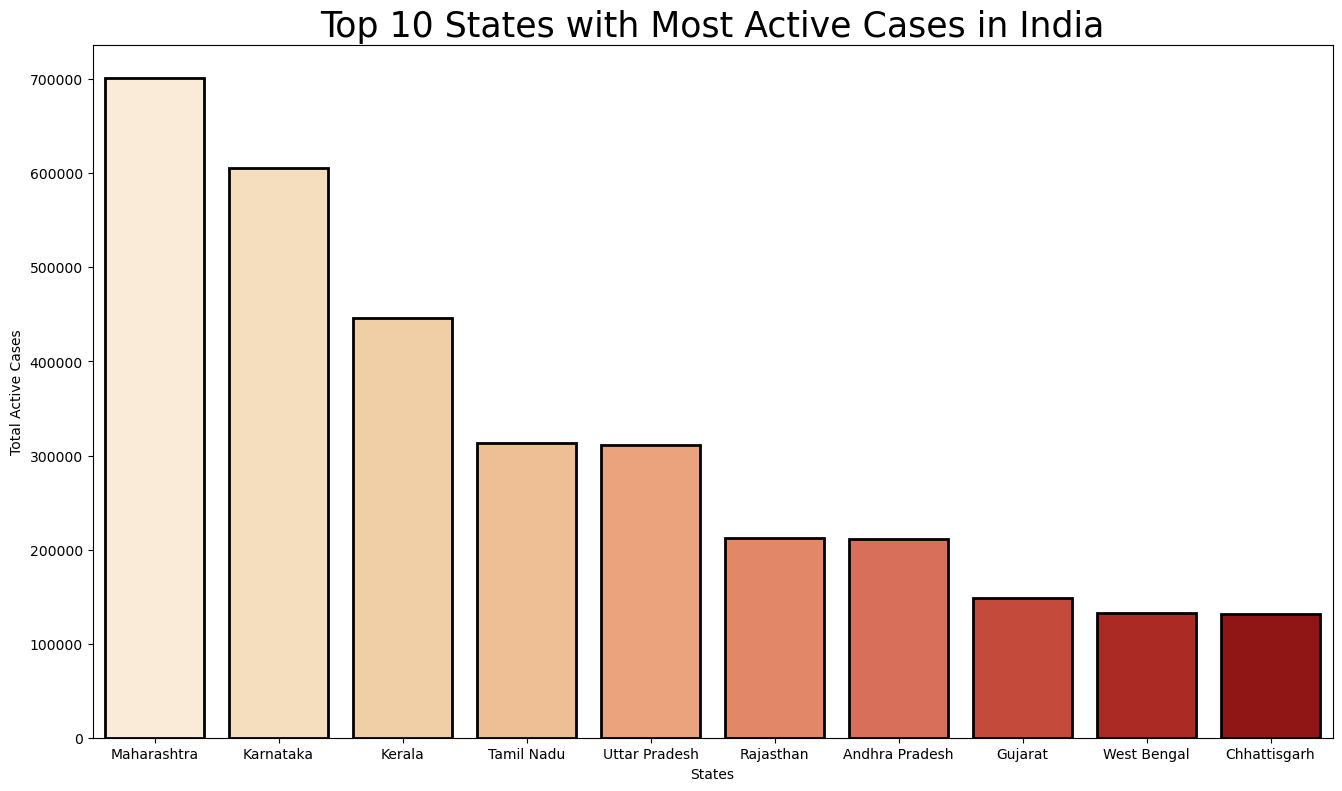

In [112]:
Top_10_Active_Cases=covid_df.groupby(by='State/UnionTerritory').max()[['Active_Cases','Date']].sort_values(by=["Active_Cases"],
                    ascending=False).reset_index()
fig=plt.figure(figsize=(16,9))
plt.title("Top 10 States with Most Active Cases in India",size=25)
ax=sns.barplot(data=Top_10_Active_Cases.iloc[:10],y="Active_Cases",x='State/UnionTerritory',linewidth=2,edgecolor="black"
               ,palette="OrRd")
plt.xlabel('States')
plt.ylabel("Total Active Cases")
plt.show()

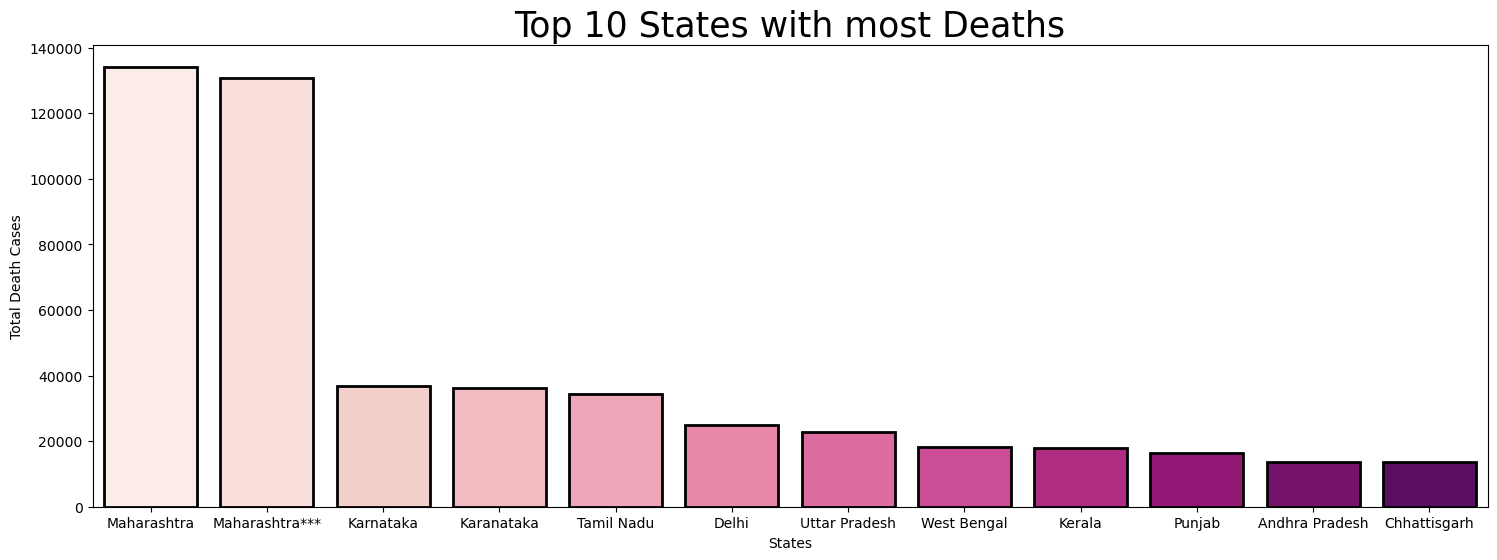

In [111]:
# Top 10 Deaths in Statewise
Top_10_Deaths=covid_df.groupby(by='State/UnionTerritory').max()[['Deaths','Date']].sort_values(by="Deaths",
                                                                                               ascending=False).reset_index()
fig=plt.figure(figsize=(18,6))
plt.title("Top 10 States with most Deaths",size=25)
ax=sns.barplot(data=Top_10_Deaths.iloc[:12],x="State/UnionTerritory",y="Deaths",linewidth=2,edgecolor='black',palette="RdPu")
plt.xlabel("States")
plt.ylabel("Total Death Cases")
plt.show()

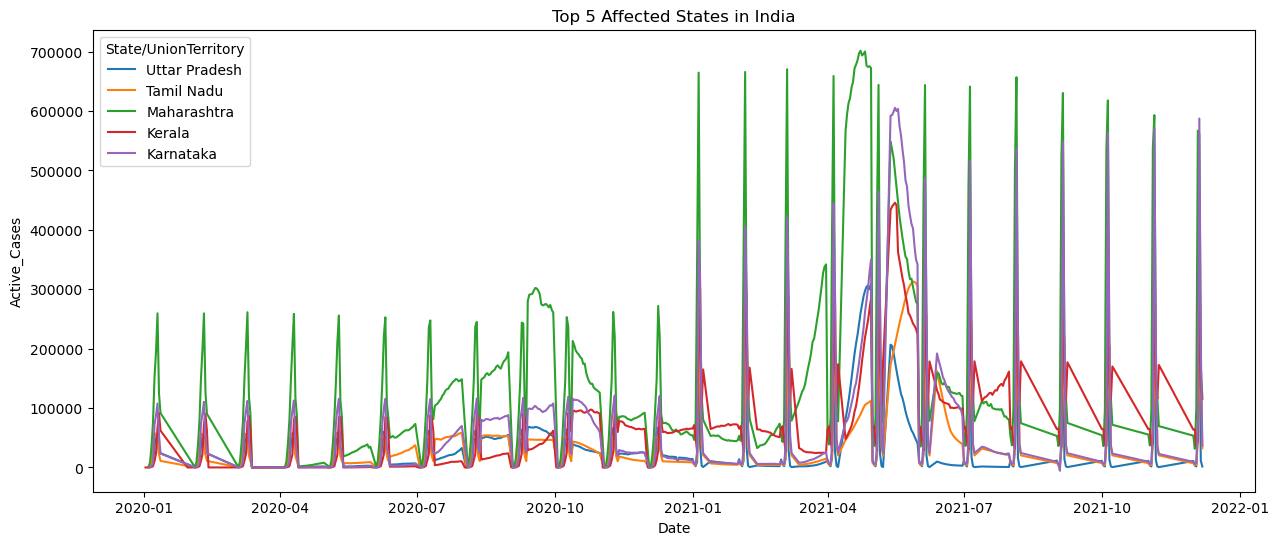

In [109]:
# Growth trend
fig=plt.figure(figsize=(15,6))
ax=sns.lineplot(x='Date',y='Active_Cases',hue='State/UnionTerritory',
                data=covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka', 'Kerala', 'Tamil Nadu', 
                                                                     'Uttar Pradesh'])])
ax.set_title("Top 5 Affected States in India")
plt.show()

In [77]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [78]:
vaccine_df.rename(columns={'Updated On':'Vaccine_Date'},inplace=True)

In [79]:
vaccine_df.head(10)

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


In [80]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [81]:
vaccine_df.isnull().sum()

Vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [82]:
vaccination=vaccine_df.drop(columns=['Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)',
                                     '45-60 Years (Doses Administered)','60+ Years (Doses Administered)'])

In [83]:
vaccination.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [85]:
# Remove rows where state is india
vaccine=vaccine_df[vaccine_df.State !='India']
vaccine.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [86]:
vaccine.rename(columns={'Total Individuals Vaccinated':"Total"},inplace=True)
vaccine.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [87]:
# Most Vaccinated State
max_vac=vaccine.groupby("State")['Total'].sum().to_frame('Total')
max_vac=max_vac.sort_values('Total',ascending=False)[:5]
max_vac

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


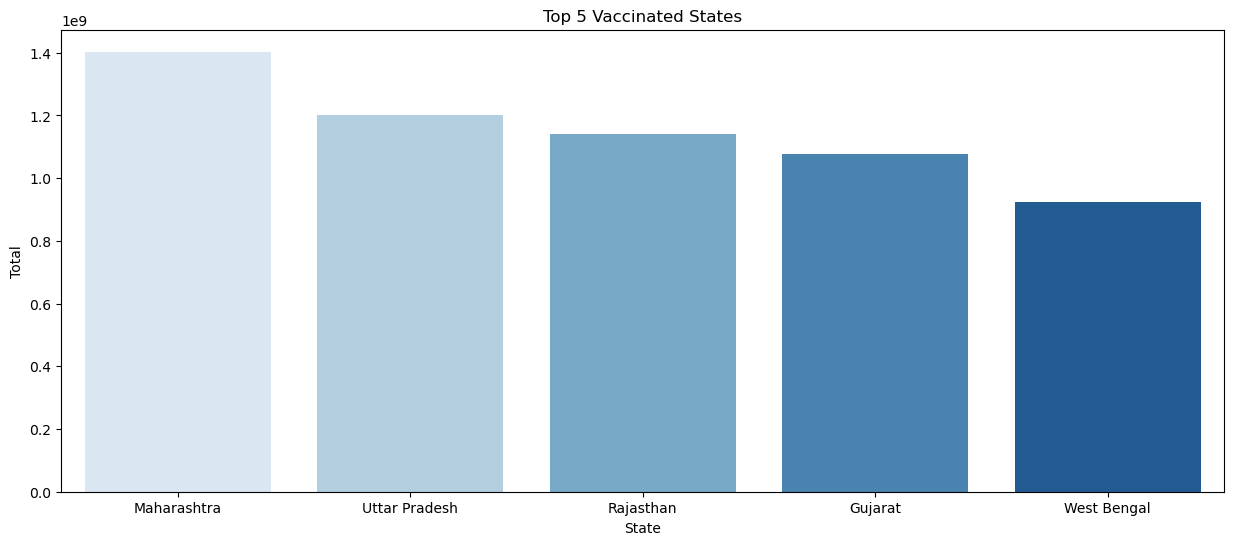

In [103]:
plt.figure(figsize=(15,6))
ax=sns.barplot(data=max_vac.iloc[:5],x=max_vac.index,y='Total',palette="Blues")
plt.title('Top 5 Vaccinated States')
plt.show()

In [89]:
min_vac=vaccine.groupby('State')['Total'].sum().to_frame('Total')
min_vac=min_vac.sort_values('Total',ascending=True)[:5]
min_vac

,Total
State,
Lakshadweep,2124715.0
Andaman and Nicobar Islands,8102125.0
Ladakh,9466289.0
Dadra and Nagar Haveli and Daman and Diu,11358600.0
Sikkim,16136752.0


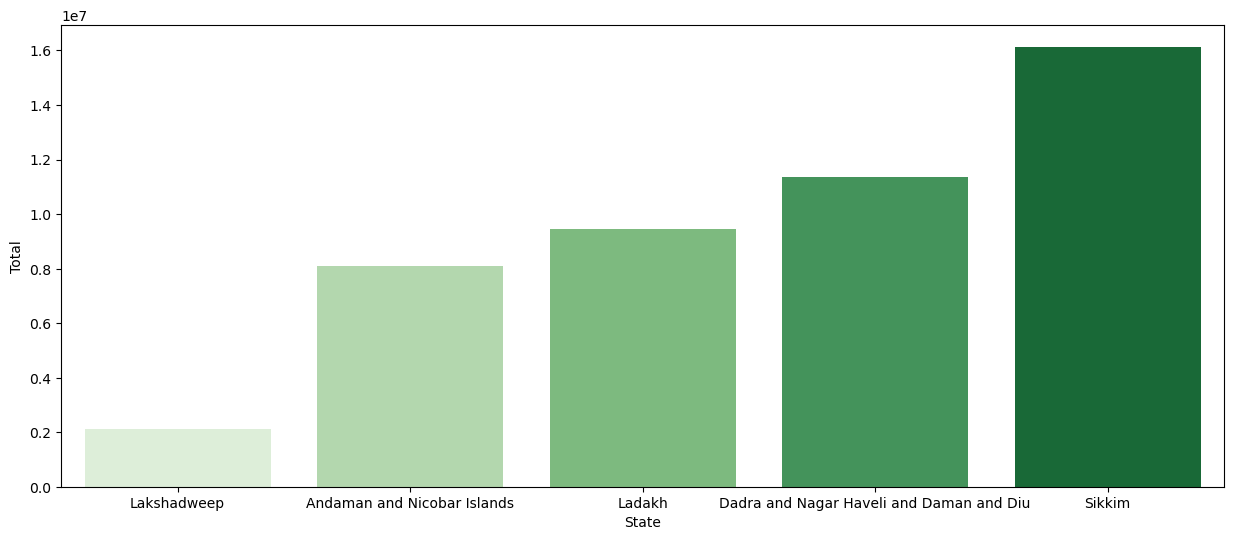

In [108]:
plt.figure(figsize=(15,6))
ax=sns.barplot(data=min_vac.iloc[:5],x=min_vac.index,y="Total",palette='Greens')
plt.show()